In [113]:
import sys
sys.path.append('/home/arusia/fastai/airsim/AirSim/PythonClient')
import numpy as np
from AirSimClient import *

In [114]:
client = CarClient()
client.confirmConnection()
client.enableApiControl(True)
car_controls = CarControls()

Waiting for connection: 


/home/arusia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


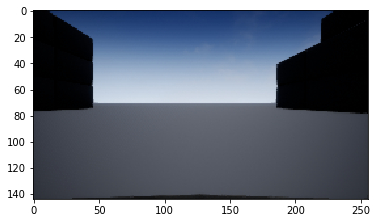

In [115]:
import matplotlib.pyplot as plt
def get_image():
    image_response = client.simGetImages([ImageRequest(0, AirSimImageType.Scene, False, False)])[0]
    image1d = np.fromstring(image_response.image_data_uint8, dtype=np.uint8)
    image_rgba = image1d.reshape(image_response.height, image_response.width, 4)
    
    return image_rgba
img=get_image()
plt.imshow(img)
plt.show()

In [123]:
import time
oldtime=time.time()
while(True):
    img=get_image()
    plt.imshow(img)
    plt.show()
    
    
    #throttle
    car_controls.throttle=-1.0
    car_controls.steering = 0.0
    
    #gear
    car_controls.is_manual_gear = True;
    car_controls.manual_gear = -1
    
    
    #send
    client.setCarControls(car_controls)
    
    
    while(time.time()-oldtime<0.5):
        continue
    oldtime=time.time()
    from IPython.display import clear_output
    clear_output(wait=True)

KeyboardInterrupt: 

In [133]:
car_controls.brake=1
client.setCarControls(car_controls)
car_controls.brake=0